In [62]:
import numpy as np
import matplotlib.pyplot as plt
# import sympy as sp
from __future__ import division, print_function
from scipy.optimize import root_scalar
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib notebook

In [71]:
N = 100
u = np.linspace(-5,5,N)
v = np.linspace(-5,5,N)
u,v = np.meshgrid(u,v,indexing='ij')
x = u + 1j * v
r = np.exp(-1j*(np.pi/5)) # angular part of lambda
lam = 1 * r
z = lam * x**3
I = Ifun(x,lam)

In [72]:
def Ifun(x,lam):
    return 1j * lam * ((x**3)/3 - x)
def Ifun_deriv(x,lam):
    return 1j * lam * (x**2 - 1)
def ReIm(x):
    return (x.real,x.imag)

In [73]:
# critical pts are 0 of the gradient
p0 = root_scalar(Ifun_deriv, args=(lam), x0=-4, x1=1j).root
p1 = root_scalar(Ifun_deriv, args=(lam), x0=3, x1=-2j).root
if Ifun(l,p0).real < Ifun(l,p1).real:
    p0,p1 = p1,p0

<IPython.core.display.Javascript object>


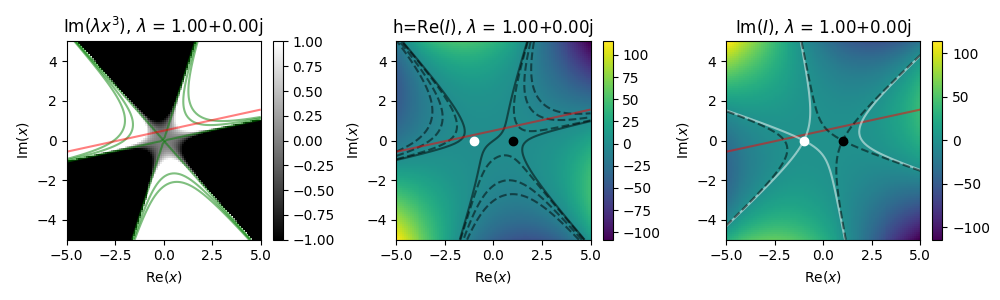

In [75]:
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.title('Im($\lambda x^3$), $\lambda$ = {:.2f}'.format(l))
plt.pcolormesh(u,v,z.imag,vmin=-1,vmax=1,cmap='gist_gray')
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,z.imag,[0,5,10],linestyle='dashed',colors='g',alpha=0.5)
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
plt.tight_layout()

plt.subplot(132)
plt.title('h=Re($I$), $\lambda$ = {:.2f}'.format(l))
plt.pcolormesh(u,v,I.real)
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,I.real,[-10,-5,-1,0],linestyle='dashed',colors='k',alpha=0.5)
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
plt.scatter(*ReIm(p0),color='w')
plt.scatter(*ReIm(p1),color='k')

plt.subplot(133)
plt.title('Im($I$), $\lambda$ = {:.2f}'.format(l))
plt.pcolormesh(u,v,I.imag)
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',linestyle='dashed',alpha=0.5)
# higher critical pt and its contour
plt.scatter(*ReIm(p0),color='w')
plt.contour(u,v,I.imag,[Ifun(p0,lam).imag],linestyle='dashed',colors='w',alpha=0.5)
#lower critical pt and its contour
plt.scatter(*ReIm(p1),color='k')
plt.contour(u,v,I.imag,[Ifun(p1,lam).imag],linestyle='dashed',colors='k',alpha=0.5)
plt.tight_layout()


In [338]:
%%capture
thetas = np.linspace(0,2*np.pi,100)
with PdfPages('airy_thimbles.pdf') as pdf:
    for theta in thetas:
        r = np.exp(-1j*theta)
        l = 1* r
        z = l * x**3
        I = 1j * l * ((x**3)/3 - x)

        plt.figure(figsize=(10,3))

        plt.subplot(131)
        plt.title('Im($\lambda x^3$), $\lambda$ = {:.2f}'.format(l))
        plt.pcolormesh(u,v,z.imag,vmin=-1,vmax=1,cmap='gist_gray')
        plt.xlabel('Re($x$)')
        plt.ylabel('Im($x$)')
        plt.colorbar()
        plt.contour(u,v,z.imag,[0,5,10],linestyle='dashed',colors='g',alpha=0.5)
        plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
        plt.tight_layout()

        plt.subplot(132)
        plt.title('h=Re($I$), $\lambda$ = {:.2f}'.format(l))
        plt.pcolormesh(u,v,I.real)
        plt.xlabel('Re($x$)')
        plt.ylabel('Im($x$)')
        plt.colorbar()
        plt.contour(u,v,I.real,[-10,-5,-1,0],linestyle='dashed',colors='k',alpha=0.5)
        plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
        plt.scatter(-1,0,color='w')
        plt.scatter(1,0,color='k')

        plt.subplot(133)
        plt.title('Im($I$), $\lambda$ = {:.2f}'.format(l))
        plt.pcolormesh(u,v,I.imag)
        plt.xlabel('Re($x$)')
        plt.ylabel('Im($x$)')
        plt.colorbar()
        plt.contour(u,v,I.imag,np.sort([-2*l.real/3,2*l.real/3,0]),linestyle='dashed',colors='k',alpha=0.5)
        plt.contour(u,v,I.imag,np.sort([2*l.real/3]),linestyle='dashed',colors='w',alpha=0.5)
        plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',linestyle='dashed',alpha=0.5)
        # plt.scatter([1,-1],[0,0],color='b')
        plt.scatter(-1,0,color='w')
        plt.scatter(1,0,color='k')
        plt.tight_layout()
        pdf.savefig()